<a href="https://colab.research.google.com/github/AndreMasalle/AndreMasalle/blob/main/Tubes_AKA_Euclid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Performa Pendekatan Rekursif vs Iteratif pada Horizontal Image Flipping

<table>
  <tr>
    <th> NIM </th>
    <th> Nama </th>
    <th> Bagian yang dikerjakan </th>    
  </tr>
  <tr>
    <td> 103012580012 </td>
    <td> Krisnia Syahwadani </td>
    <td> Iteratif </td>
  </tr>
  <tr>
    <td> 103012580016 </td>
    <td> IGN Brindawan Tri Guna Yoga </td>
    <td> Rekursif </td>
  </tr>
  <tr>
    <td> 103012580019 </td>
    <td> Andre Fransiscus Masalle </td>
    <td> Ide dan Analisis </td>
  </tr>
</table>

**Note: Teks yang udah ada gambarnya gausah diotak-atik lagi :D**


Contoh Gambar bisa ambil sini:
https://drive.google.com/drive/folders/1tpZc44HsvXNyKCNCGPozxHc_OXzmndF_?usp=sharing

## Objektif

1. Horizontal Image Flipping
2. Analisis runtime

## Akses Tensor RGB

 Tentang tensor image:
- tensor per channel tuh representasi dari intensitas cahaya si warna itu. Misal: Di tensor red ada nilai 0, brarti warna merah tuh gak muncul (gelap kalo di visualnya). Kalau nilai 255 berarti merahnya maksimal (terang kalo di visualnya)
- Interval nilainya tuh cuma 0-255

In [ ]:
# Note: Ini juga gausah diotak-atik, terus pake library ini aja cukup lah ya. Goodluck ;D
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd

In [ ]:
# path ke gambarnya
naiad = Image.open("/content/naiad.jpg")
fgo = Image.open("/content/fgo2.jpg")
lunar = Image.open("/content/grave-of-the-lunar-goddess.png")

paths = {
    "Fate Grand Order": "/content/fgo2.jpg",
    "Naiad": "/content/naiad.jpg",
    "Where Winds Meet": "/content/grave-of-the-lunar-goddess.png",
    "Catur": "/content/chess.jpg",
    "Daun": "/content/daun.jpg",
    "Mobil": "/content/lamborghini-veneno.jpeg"
}

In [ ]:
def ambil_tensor(path_img):

  img = Image.open(path_img)
  width, height = img.size
  tensor = np.array(img)

  ukuran_data = width*height

  red = tensor[:,:,0]
  green = tensor[:,:,1]
  blue = tensor[:,:,2]

  return {
      "ukuran_img": (width, height),
      "tensor": tensor.shape,
      "ukuran_data": ukuran_data,
      "red": red,
      "green": green,
      "blue": blue
  }

def tampilin_gambar(rgb_dict):
    red = rgb_dict["red"]
    green = rgb_dict["green"]
    blue = rgb_dict["blue"]

    rgb_img = np.stack((red, green, blue), axis=2)

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    axs[0].imshow(red, cmap="gray")
    axs[0].set_title("Channel merah")
    axs[0].axis("off")

    axs[1].imshow(green, cmap="gray")
    axs[1].set_title("Channel ijo")
    axs[1].axis("off")

    axs[2].imshow(blue, cmap="gray")
    axs[2].set_title("Channel biru")
    axs[2].axis("off")

    axs[3].imshow(rgb_img)
    axs[3].set_title("Gabungan RGB")
    axs[3].axis("off")

    plt.show()

## Cara pake

In [ ]:
size = []
nama_gbr = []

for nama,path in paths.items():
  tensor = ambil_tensor(path)
  nama_gbr.append(nama)
  size.append(tensor["ukuran_data"])

print(nama_gbr)
print(size)

['Fate Grand Order', 'Naiad', 'Where Winds Meet', 'Catur', 'Daun', 'Mobil']
[49800, 541696, 4096000, 8294400, 12178660, 33177600]


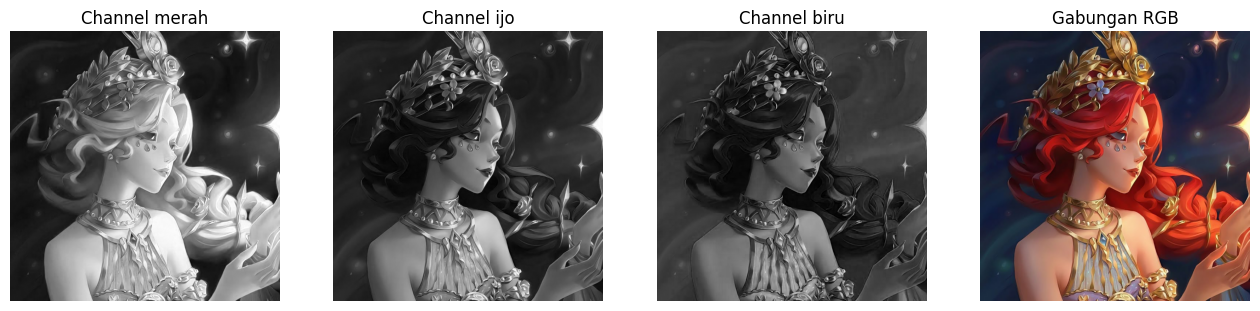

Ukuran Gambar:  (736, 736)
Ukuran Tensor:  (736, 736, 3)
Ukuran Data:  541696

 Tensor Red: 
 [[21 21 21 ... 32 32 32]
 [21 21 21 ... 32 32 32]
 [21 21 21 ... 33 32 32]
 ...
 [26 26 26 ... 39 42 45]
 [26 26 26 ... 40 41 43]
 [26 26 26 ... 43 41 41]]

 Tensor Green: 
 [[27 27 27 ... 44 44 44]
 [27 27 27 ... 44 44 44]
 [27 27 27 ... 44 44 44]
 ...
 [43 43 43 ... 48 48 51]
 [43 43 43 ... 49 47 49]
 [43 43 43 ... 52 47 47]]

 Tensor Blue: 
 [[43 43 43 ... 66 66 66]
 [43 43 43 ... 66 66 66]
 [43 43 43 ... 66 66 66]
 ...
 [63 63 63 ... 77 80 83]
 [63 63 63 ... 78 79 81]
 [63 63 63 ... 81 79 79]]


In [ ]:
# Cara pake

naiad = ambil_tensor("/content/naiad.jpg")
tampilin_gambar(naiad)
print("Ukuran Gambar: ", naiad["ukuran_img"])
print("Ukuran Tensor: ", naiad["tensor"])
print("Ukuran Data: ", naiad["ukuran_data"])

print("\n Tensor Red: \n", naiad["red"])
print("\n Tensor Green: \n", naiad["green"])
print("\n Tensor Blue: \n", naiad["blue"])

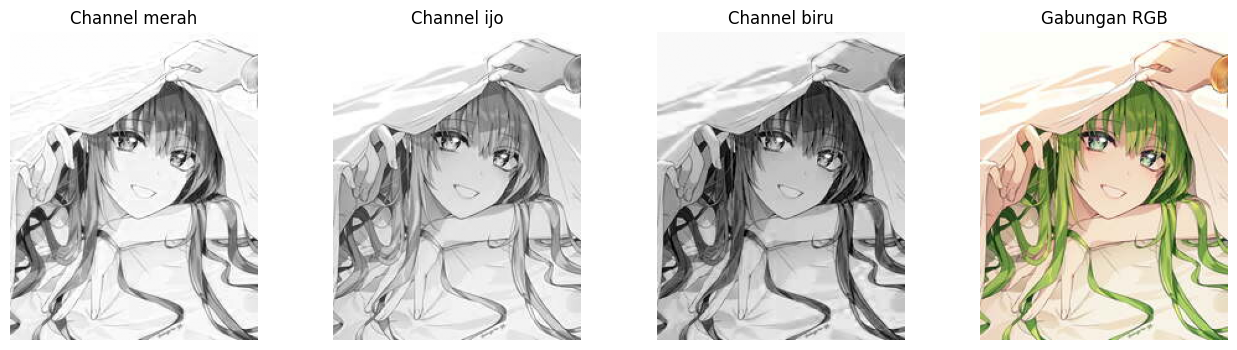

Ukuran Gambar:  (200, 249)
Ukuran Tensor:  (249, 200, 3)

 Tensor Red: 
 [[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [255 236 226 ... 148 187 215]
 [238 248 245 ...  68  95 134]
 [233 233 234 ...  79  71  57]]

 Tensor Green: 
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [238 207 197 ... 163 197 220]
 [201 211 211 ...  91 111 145]
 [211 211 212 ... 126 121 107]]

 Tensor Blue: 
 [[249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 ...
 [222 191 181 ... 120 162 188]
 [192 202 199 ...  47  75 113]
 [187 187 188 ...  56  52  38]]


In [ ]:
fgo = ambil_tensor("/content/fgo2.jpg")
tampilin_gambar(fgo)
print("Ukuran Gambar: ", fgo["ukuran_img"])
print("Ukuran Tensor: ", fgo["tensor"])

print("\n Tensor Red: \n", fgo["red"])
print("\n Tensor Green: \n", fgo["green"])
print("\n Tensor Blue: \n", fgo["blue"])

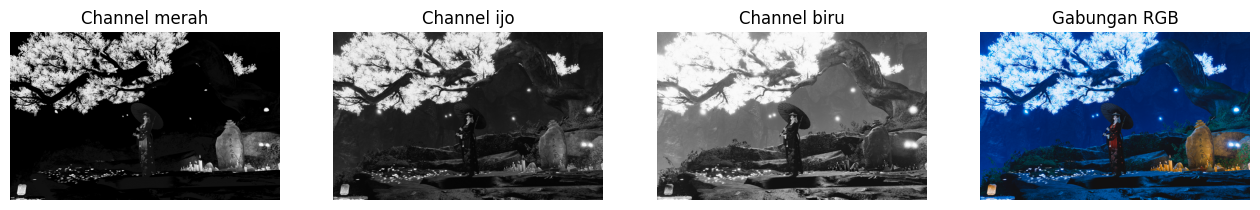

Ukuran Gambar:  (2560, 1600)
Ukuran Tensor:  (1600, 2560, 3)

 Tensor Red: 
 [[  0   0   0 ...   2   2   2]
 [  0   0   0 ...   2   2   2]
 [  0   0   0 ...   2   2   2]
 ...
 [  0   0   0 ...   0   0   0]
 [ 23  20  23 ...   0   0   0]
 [208 210 207 ...   0   0   0]]

 Tensor Green: 
 [[ 51  51  51 ...  36  38  33]
 [ 53  52  50 ...  35  34  34]
 [ 49  47  48 ...  35  34  35]
 ...
 [ 72  75  75 ...  47  46  47]
 [ 95  88  90 ...  44  44  42]
 [221 223 220 ...  43  42  44]]

 Tensor Blue: 
 [[138 139 139 ...  87  92  85]
 [140 138 139 ...  87  86  86]
 [136 134 133 ...  88  89  86]
 ...
 [156 160 158 ...  86  86  86]
 [171 166 166 ...  82  82  81]
 [240 241 239 ...  82  83  85]]


In [ ]:
lunar = ambil_tensor("/content/grave-of-the-lunar-goddess.png")
tampilin_gambar(lunar)
print("Ukuran Gambar: ", lunar["ukuran_img"])
print("Ukuran Tensor: ", lunar["tensor"])

print("\n Tensor Red: \n", lunar["red"])
print("\n Tensor Green: \n", lunar["green"])
print("\n Tensor Blue: \n", lunar["blue"])

# Iteratif

Alur iteratifnya seperti ini:


1.   Akses tensornya
2.   Pisah per channel RGB
3.   Loop di tensor salah satu channel, swap elemen paling kiri sama paling kanan per baris sampai tengah
4.   Kalau udah 1 channel lanjut ke channel setelahnya (Kalau red udah brarti ke green dan seterusnya sampe udah flip tensor channel RGBnya)
5.   Kalau udah digabungin lagi

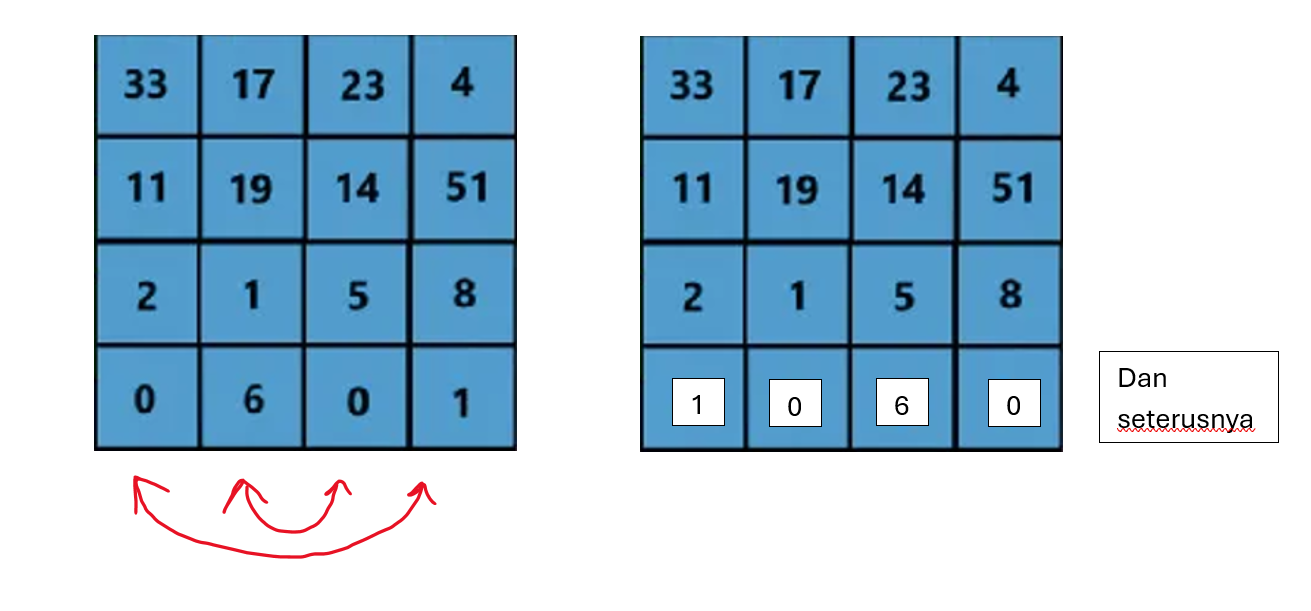

In [ ]:
# Kode nya ditaruh disini
# Library udah ditaruh dibagian akses tensor

def informasi_gambar(path):
  tensor_gambar = ambil_tensor(path)
  H,W = tensor_gambar.shape




=== FATE GRAND ORDER ===
Path: /content/fgo2.jpg
H,W = 249,200 | tensor = (249, 200, 3) | n = 49800
Runtime flip: 0.0997 detik


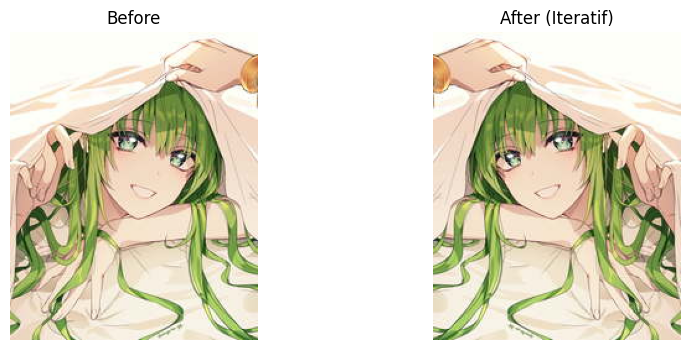


=== NAIAD ===
Path: /content/naiad.jpg
H,W = 736,736 | tensor = (736, 736, 3) | n = 541696
Runtime flip: 1.0853 detik


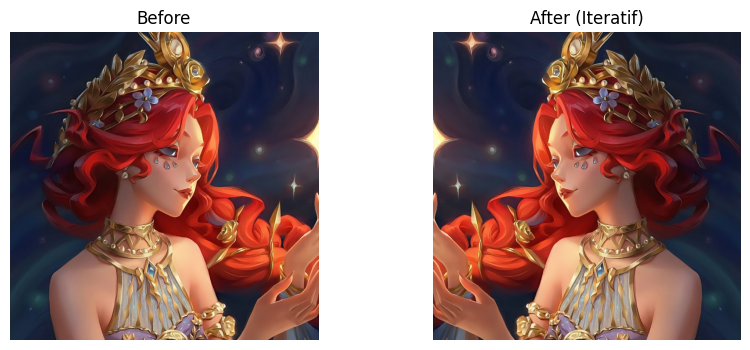


=== WHERE WINDS MEET ===
Path: /content/grave-of-the-lunar-goddess.png
H,W = 1600,2560 | tensor = (1600, 2560, 3) | n = 4096000
Runtime flip: 4.4932 detik


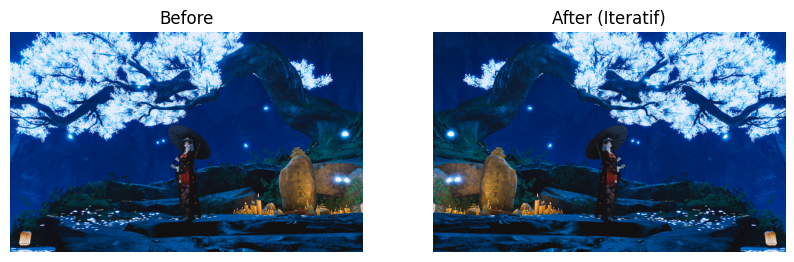


=== CATUR ===
Path: /content/chess.jpg
H,W = 3840,2160 | tensor = (3840, 2160, 3) | n = 8294400
Runtime flip: 10.6466 detik


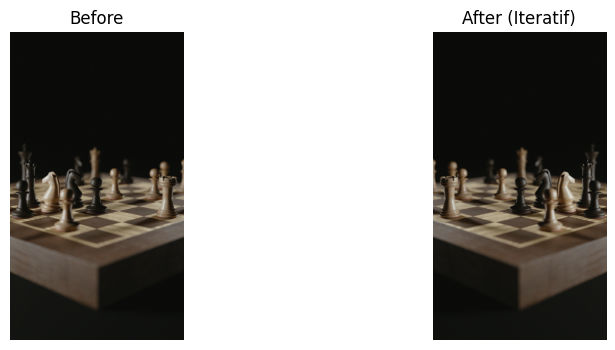


=== DAUN ===
Path: /content/daun.jpg
H,W = 4030,3022 | tensor = (4030, 3022, 3) | n = 12178660
Runtime flip: 14.1086 detik


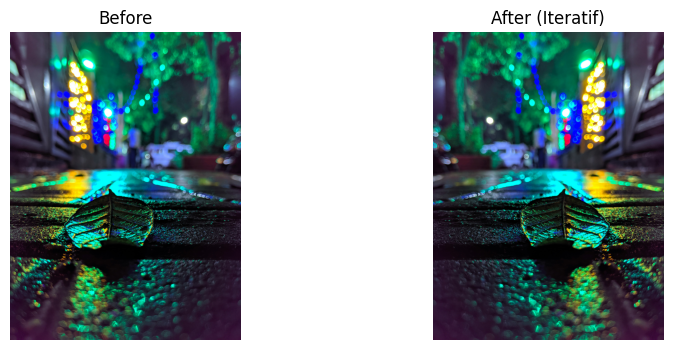


=== MOBIL ===
Path: /content/lamborghini-veneno.jpeg
H,W = 4320,7680 | tensor = (4320, 7680, 3) | n = 33177600
Runtime flip: 39.4504 detik


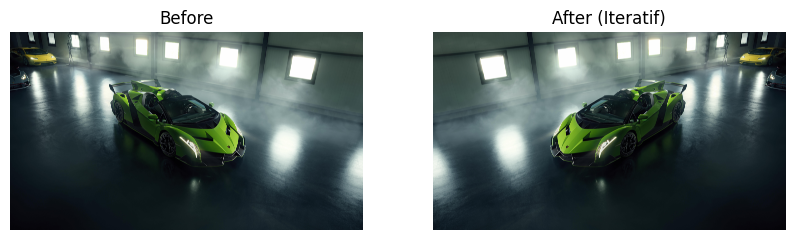


--- Ringkasan Runtime ---
Gambar 1: 0.0997 detik
Gambar 2: 1.0853 detik
Gambar 3: 4.4932 detik
Gambar 4: 10.6466 detik
Gambar 5: 14.1086 detik
Gambar 6: 39.4504 detik


In [ ]:
# (2)
def load_rgb(path):
    rgb = ambil_tensor(path)
    H, W = rgb["red"].shape
    n = H * W
    print(f"Path: {path}")
    print(f"H,W = {H},{W} | tensor = {rgb['tensor']} | n = {n}")
    return rgb, n

# (3)
def flip_channel_iter(channel):
    H, W = channel.shape
    ch = channel.copy()
    for i in range(H):
        for j in range(W // 2):
            ch[i, j], ch[i, W-1-j] = ch[i, W-1-j], ch[i, j]
    return ch

# (4)
def flip_rgb_iter(rgb):
    r = flip_channel_iter(rgb["red"])
    g = flip_channel_iter(rgb["green"])
    b = flip_channel_iter(rgb["blue"])
    return np.stack((r, g, b), axis=2)

# (5)
def show_before_after(rgb, after_rgb):
    before_rgb = np.stack((rgb["red"], rgb["green"], rgb["blue"]), axis=2)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(before_rgb); plt.title("Before"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(after_rgb);  plt.title("After (Iteratif)"); plt.axis("off")
    plt.show()

runtime_iteratif = []

for label in paths:
    print(f"\n=== {label.upper()} ===")
    rgb, n = load_rgb(paths[label])

    start = time.time()
    rgb_flip = flip_rgb_iter(rgb)
    end = time.time()

    runtime = end - start
    runtime_iteratif.append(runtime)
    print(f"Runtime flip: {runtime:.4f} detik")

    show_before_after(rgb, rgb_flip)

print("\n--- Ringkasan Runtime ---")
for idx, t in enumerate(runtime_iteratif):
    print(f"Gambar {idx+1}: {t:.4f} detik")

In [ ]:
print(runtime_iteratif)

[0.09969615936279297, 1.0852534770965576, 4.493180513381958, 10.646581888198853, 14.108577728271484, 39.45035266876221]


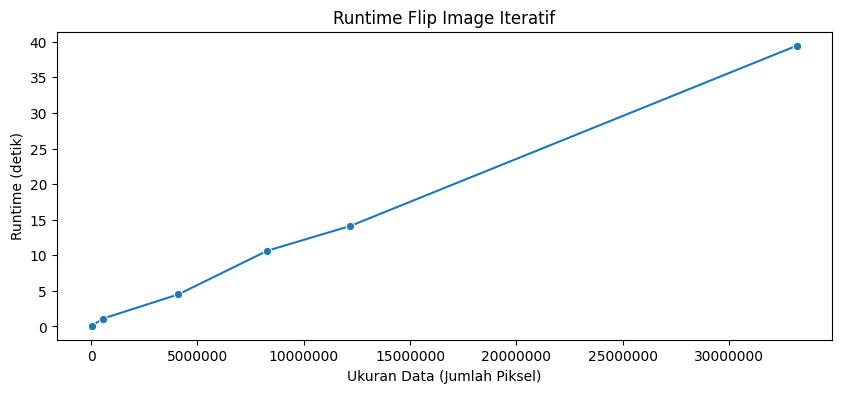

In [ ]:
df_iter = pd.DataFrame({
    "Ukuran Data (Jumlah Piksel)": size,
    "Runtime (detik)": runtime_iteratif
})

plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_iter,
    x="Ukuran Data (Jumlah Piksel)",
    y="Runtime (detik)",
    marker="o"
)
plt.ticklabel_format(style='plain', axis='x')


plt.title("Runtime Flip Image Iteratif")
plt.show()

## Analisis Iteratif

1. Pertama-tama, dari operasi yang paling yakni swap. Berikut adalah kodenya:

```python
def flip_channel_iter(ch):
    H, W = ch.shape
    for i in range(H):
        for j in range(W // 2):
            ch[i, j], ch[i, W-1-j] = ch[i, W-1-j], ch[i, j]
    return ch
```

Pada kode tersebut dapat dihitung kompleksitas inner loopnya adalah sebagai berikut:

$$
T_{inner}(H,W) = \sum_{i=1}^{H} \sum_{j=1}^{W/2} 1 = \frac{H \cdot W}{2}
$$

Dikarenakan horizontal maka yang swap adalah kiri dan kanan sehingga yang dibagi 2 adalah width nya




2. Kemudian hal yang sama dilakukan pada 3 channel RGB:

```python
def flip_rgb_iter(rgb):
    r = flip_channel_iter(rgb["red"])
    g = flip_channel_iter(rgb["green"])
    b = flip_channel_iter(rgb["blue"])
    return np.stack((r, g, b), axis=2)
```


sehingga didapati seperti berikut:

$$
T_{iteratif}(H,W) = \sum_{i=1}^{3} \sum_{j=1}^{H} \sum_{k=1}^{W/2} 1 = \frac{3 \cdot H \cdot W}{2} = \frac{3}{2}n
$$

Maka:

$$
 T_{iteratif}(H,W) \in O(HW)
$$

atau dengan $ n=H \cdot W $

$$
 T_{iteratif}(n) \in O(n)
$$

# Rekursif

1.   Akses tensornya
2.   Pisah per channel RGB
3.   Loop di tensor salah satu channel, swap elemen paling kiri sama paling kanan per baris sampai tengah
4.   Kalau udah 1 channel lanjut ke channel setelahnya (Kalau red udah brarti ke green dan seterusnya sampe udah flip tensor channel RGBnya)
5.   Kalau udah digabungin lagi

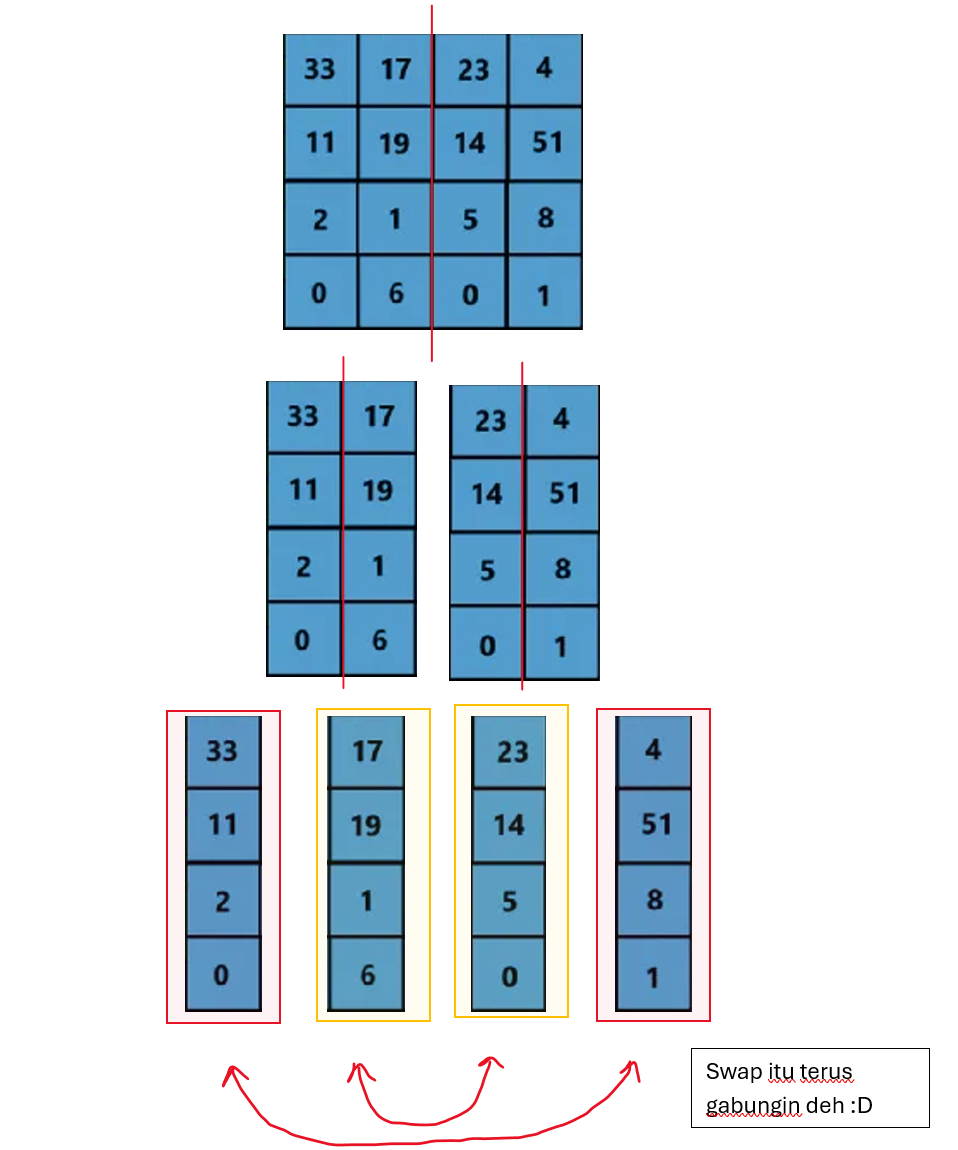

In [ ]:
import sys
# Cek limit rekursif di gcolab
print(sys.getrecursionlimit())

# note:
# recursion limit dinaikin karena ukuran gambar besar
# bikin depth rekursi > 1000

sys.setrecursionlimit(15000)
print(sys.getrecursionlimit())

1000
15000



=== FATE GRAND ORDER ===
Runtime flip: 0.0456 detik


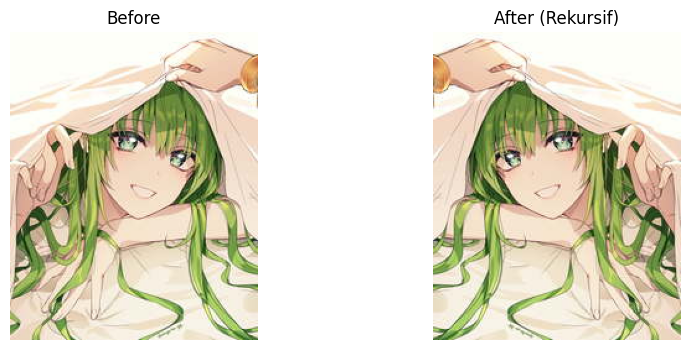


=== NAIAD ===
Runtime flip: 0.5344 detik


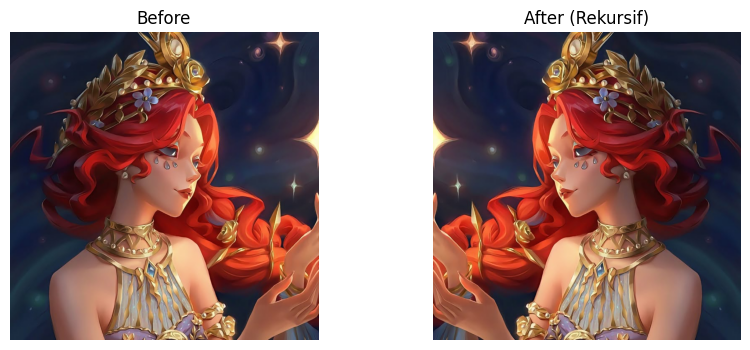


=== WHERE WINDS MEET ===
Runtime flip: 3.9260 detik


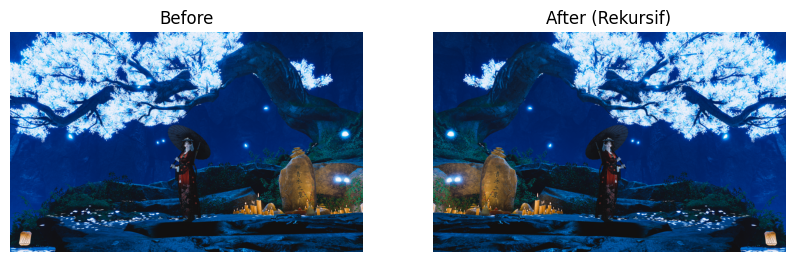


=== CATUR ===
Runtime flip: 9.1502 detik


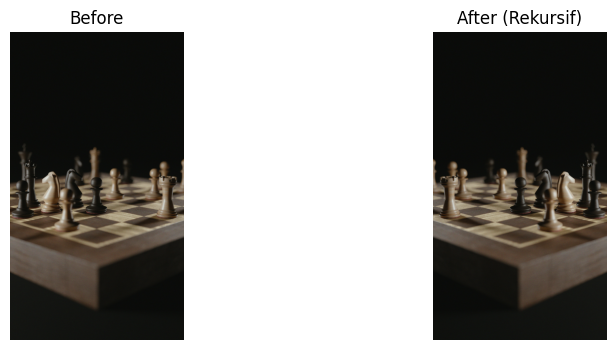


=== DAUN ===
Runtime flip: 12.8957 detik


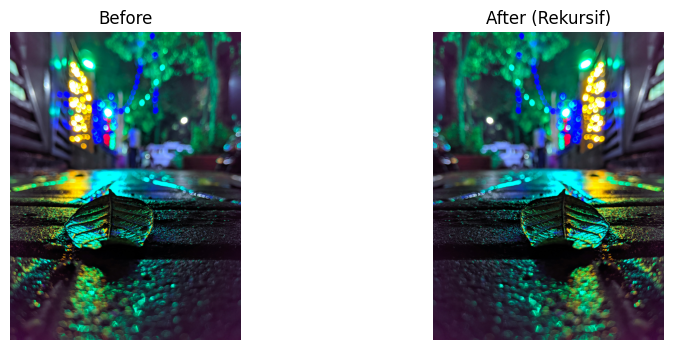


=== MOBIL ===
Runtime flip: 36.3339 detik


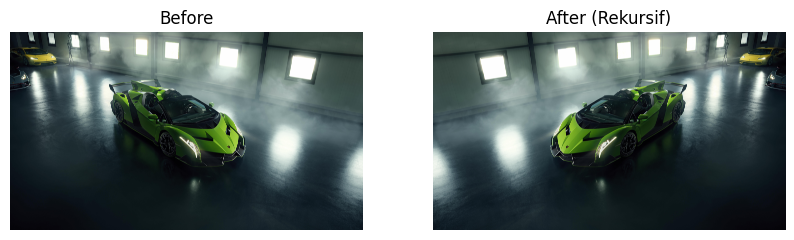


--- Ringkasan Runtime ---
Gambar 1: 0.0456 detik
Gambar 2: 0.5344 detik
Gambar 3: 3.9260 detik
Gambar 4: 9.1502 detik
Gambar 5: 12.8957 detik
Gambar 6: 36.3339 detik


In [ ]:
# Kode nya ditaruh disini
# Library udah ditaruh dibagian akses tensor


def swap_barisan_rekursif(baris, kiri, kanan):
    # Basis rekursi: jika pointer bertemu atau melewati tengah
    if kiri >= kanan:
        return

    # Tukar elemen kiri dan kanan
    baris[kiri], baris[kanan] = baris[kanan], baris[kiri]

    # Panggil rekursi ke dalam (menuju tengah)
    swap_barisan_rekursif(baris, kiri + 1, kanan - 1)

def flip_channel_rekursif(channel, index_baris=0):
    # Basis rekursi: semua baris sudah diproses
    if index_baris >= channel.shape[0]:
        return

    # Ambil satu baris
    baris = channel[index_baris]

    # Swap kiri-kanan pada baris tersebut
    swap_barisan_rekursif(baris, 0, len(baris) - 1)

    # Lanjut ke baris berikutnya
    flip_channel_rekursif(channel, index_baris + 1)


# def flip_channel_rekursif(channel, index_baris=0):
#     # Basis rekursi: semua baris sudah diproses
#     if index_baris >= channel.shape[0]:
#         return

#     # Ambil satu baris
#     baris = channel[index_baris]

#     # Swap kiri-kanan pada baris tersebut
#     swap_barisan_rekursif(baris, 0, len(baris) - 1)

#     # Lanjut ke baris berikutnya
#     flip_channel_rekursif(channel, index_baris + 1)

def flip_rgb_rekursif(rgb_dict, index_channel=0):
    channels = ["red", "green", "blue"]

    # Basis rekursi: semua channel selesai
    if index_channel >= len(channels):
        return

    # Ambil channel aktif
    nama_channel = channels[index_channel]
    channel = rgb_dict[nama_channel]

    # Flip channel
    flip_channel_rekursif(channel)

    # Lanjut ke channel selanjutnya
    flip_rgb_rekursif(rgb_dict, index_channel + 1)


def gabung_rgb(rgb_dict):
    return np.stack(
        (rgb_dict["red"], rgb_dict["green"], rgb_dict["blue"]),
        axis=2
    )


# ============================================================

def show_before_after(rgb, after_rgb):
    before_rgb = np.stack(
        (rgb["red"], rgb["green"], rgb["blue"]),
        axis=2
    )

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(before_rgb)
    plt.title("Before")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(after_rgb)
    plt.title("After (Rekursif)")
    plt.axis("off")

    plt.show()

# ============================================================

runtime_rekursif = []

for label in paths:
    print(f"\n=== {label.upper()} ===")

    rgb = ambil_tensor(paths[label])

    # Simpan sebelumnya
    rgb_before = {
        "red": rgb["red"].copy(),
        "green": rgb["green"].copy(),
        "blue": rgb["blue"].copy()
    }

    start = time.time()
    flip_rgb_rekursif(rgb)
    end = time.time()

    runtime = end - start
    runtime_rekursif.append(runtime)

    print(f"Runtime flip: {runtime:.4f} detik")

    hasil_flip = gabung_rgb(rgb)

    show_before_after(rgb_before, hasil_flip)


print("\n--- Ringkasan Runtime ---")
for idx, t in enumerate(runtime_rekursif):
    print(f"Gambar {idx+1}: {t:.4f} detik")




In [ ]:
print(runtime_rekursif)

[0.045638322830200195, 0.534381628036499, 3.9260001182556152, 9.15015721321106, 12.89574670791626, 36.333889961242676]


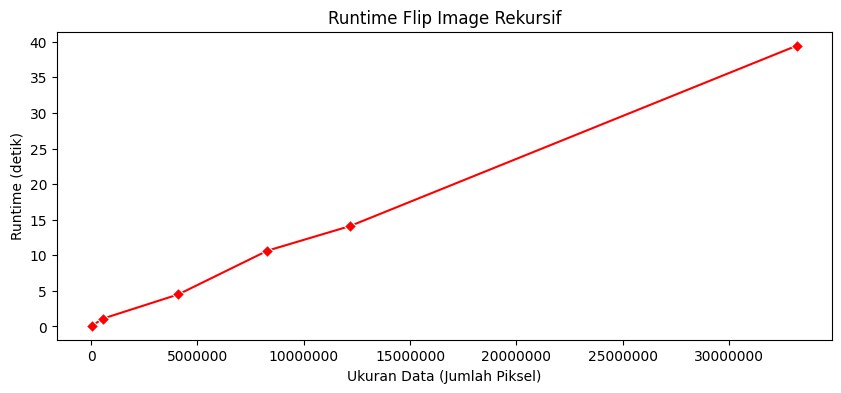

In [ ]:
df_rekur = pd.DataFrame({
    "Ukuran Data (Jumlah Piksel)": size,
    "Runtime (detik)": runtime_rekursif
})

plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_iter,
    x="Ukuran Data (Jumlah Piksel)",
    y="Runtime (detik)",
    marker="D",
    color="red"
)
plt.ticklabel_format(style='plain', axis='x')

plt.title("Runtime Flip Image Rekursif")
plt.show()

## Analisis Rekursif

1. Pertama-tama dari rekursif terdalam, yakni:
```python
def swap_barisan_rekursif(baris, kiri, kanan):
    # Basis rekursi: jika pointer bertemu atau melewati tengah
    if kiri >= kanan:
        return

    # Tukar elemen kiri dan kanan
    baris[kiri], baris[kanan] = baris[kanan], baris[kiri]

    # Panggil rekursi ke dalam (menuju tengah)
    swap_barisan_rekursif(baris, kiri + 1, kanan - 1)
```
Didapati $T(n)$ sebagai berikut:

$$
T_{baris}(W) =
\begin{cases}
0 & \text{jika } kiri ≥ kanan \\
1 + T(W-2) & \text{lainnya}
\end{cases}
$$

- $W = \text{jumlah kolom}$

Maka untuk solusi rekursif terdalam adalah

$$ T_{baris}(W) = \frac{W}{2} $$

2. Kemudian untuk flip pada channelnya (rekursif yang bagian tengah):

```python
def flip_channel_rekursif(channel, index_baris=0):
    # Basis rekursi: semua baris sudah diproses
    if index_baris >= channel.shape[0]:
        return

    # Ambil satu baris
    baris = channel[index_baris]

    # Swap kiri-kanan pada baris tersebut
    swap_barisan_rekursif(baris, 0, len(baris) - 1)

    # Lanjut ke baris berikutnya
    flip_channel_rekursif(channel, index_baris + 1)
```

didapati T(n) sebagai berikut:
$$
T_{channel}(H,W) =
\begin{cases}
0 &  H=0 \\
T_{baris}(W) + T(H-1, W) & H>0
\end{cases}
$$

- $H = \text{jumlah baris}$
- $W = \text{jumlah kolom}$

Maka untuk solusi rekursif bagian tengah ini adalah:

$$
T_{channel}(H,W) = \frac{H \cdot W}{2}
$$

3. Untuk rekursif terluar atau rekursif pada 3 channel:

```python
def flip_rgb_rekursif(rgb_dict, index_channel=0):
    channels = ["red", "green", "blue"]

    # Basis rekursi: semua channel selesai
    if index_channel >= len(channels):
        return

    # Ambil channel aktif
    nama_channel = channels[index_channel]
    channel = rgb_dict[nama_channel]

    # Flip channel
    flip_channel_rekursif(channel)

    # Lanjut ke channel selanjutnya
    flip_rgb_rekursif(rgb_dict, index_channel + 1)
```

didapati T(n) sebagai berikut:
$$
T_{rgb}(H,W) =
\begin{cases}
0 &  c=0 \\
T_{channel}(H,W) + T_{rgb}(H, W, c-1) & c>0
\end{cases}
$$

- $H = \text{jumlah baris}$
- $W = \text{jumlah kolom}$
- $c = \text{3 channel (R,G,B)}$


Maka untuk solusi rekursif bagian tengah ini adalah:
$$
T_{rgb}(H,W) = \frac{3 \cdot H \cdot W}{2} = \frac{3}{2}HW
$$

Sehingga

$$
T_{rekursif}(H,W) \in O(HW)
$$

Jika $ n = H \cdot W $, maka:

$$
T_{rekursif}(n) \in O(n)
$$

# Komparasi Hasil

In [ ]:
df_banding = pd.DataFrame({
    "Nama Gambar": nama_gbr,
    "Ukuran Data": size,
    "Runtime Rekursif": runtime_rekursif,
    "Runtime Iteratif": runtime_iteratif
})

In [ ]:
df_banding

Nama Gambar  Ukuran Data  Runtime Rekursif  Runtime Iteratif
0  Fate Grand Order        49800          0.045638          0.099696
1             Naiad       541696          0.534382          1.085253
2  Where Winds Meet      4096000          3.926000          4.493181
3             Catur      8294400          9.150157         10.646582
4              Daun     12178660         12.895747         14.108578
5             Mobil     33177600         36.333890         39.450353

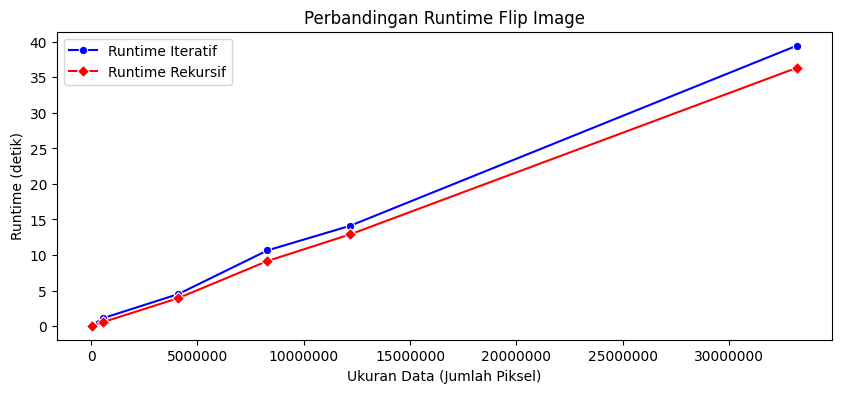

In [ ]:

plt.figure(figsize=(10,4))

sns.lineplot(
    x=df_banding["Ukuran Data"],
    y=df_banding["Runtime Iteratif"],
    marker="o",
    color="blue",
    label="Runtime Iteratif"
)

sns.lineplot(
    x=df_banding["Ukuran Data"],
    y=df_banding["Runtime Rekursif"],
    marker="D",
    color="red",
    label="Runtime Rekursif"
)

plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Ukuran Data (Jumlah Piksel)")
plt.ylabel("Runtime (detik)")
plt.title("Perbandingan Runtime Flip Image")
plt.legend()

plt.show()
